# Theoretical

Q1. What is a Decision Tree, and how does it work?

* Definition: A Decision Tree is a supervised machine learning algorithm that uses a tree-like structure to represent decisions and their possible consequences. It's used for both classification (predicting categories) and regression (predicting continuous values).
* How it works:
  * It starts with a root node representing the entire dataset.
  * The algorithm recursively splits the data based on feature values, aiming to create subsets that are as pure as possible with respect to the target variable.
  * Each internal node represents a decision based on a feature, each branch represents an outcome of the decision, and each leaf node represents a prediction (class label or numerical value).
  * The splitting process continues until a stopping criterion is met (e.g., maximum depth, minimum samples per leaf).

Q2. What are impurity measures in Decision Trees?

* Definition: Impurity measures quantify how "mixed" or "impure" a subset of data is with respect to the target variable. A pure subset contains only one class (in classification) or has minimal variance (in regression).
* Common measures:
  * Gini Impurity: Measures the probability of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.
  * Entropy: Measures the disorder or randomness in the subset.
  * Variance (for regression): Measures the spread of the target variable values in the subset.

Q3. What is the mathematical formula for Gini Impurity?

* Formula:

Gini(S) = 1 - Σ (pi)^2
* where:

S is the subset of data.

pi is the proportion of elements in S belonging to class i.

Σ denotes the sum over all classes.

Q4. What is the mathematical formula for Entropy?

* Formula:

Entropy(S) = - Σ pi * log2(pi)
* where:

S is the subset of data.

pi is the proportion of elements in S belonging to class i.

Σ denotes the sum over all classes.

log2 is the logarithm base 2.

Q5.What is Information Gain, and how is it used in Decision Trees?

* Definition: Information Gain measures the reduction in entropy (or impurity) achieved by splitting a dataset based on a feature.
* How it's used:
  * The algorithm calculates the Information Gain for each feature.
  * The feature with the highest Information Gain is chosen as the splitting criterion at each node.
  * This process aims to create splits that lead to the most homogeneous subsets.
* Formula (using Entropy):

Information Gain(S, A) = Entropy(S) - Σ (|Sv| / |S|) * Entropy(Sv)

where:
* S is the current subset.
* A is the feature being considered for splitting.
* Sv are the subsets created by splitting S based on feature A.
* |Sv| and |S| are the sizes of the subsets.

Q6.What is the difference between Gini Impurity and Entropy?

* Entropy measures the uncertainty of a system and is used in information theory.
* Gini Impurity measures the probability of misclassification.
* Gini is computationally faster since it does not involve logarithms.

Q7. What is the mathematical explanation behind Decision Trees?

Decision Trees use recursive partitioning based on impurity measures to split nodes. The goal is to minimize impurity at each step. The process stops based on criteria like depth, minimum samples per node, or no further information gain.

Q8.What is Pre-Pruning in Decision Trees?

Pre-Pruning stops the tree from growing when certain conditions (e.g., max depth, min samples per split) are met. This prevents overfitting.

Q9. What is Post-Pruning in Decision Trees?

Post-Pruning involves growing the full tree first and then trimming nodes based on validation performance to reduce overfitting.



Q10. What is the difference between Pre-Pruning and Post-Pruning?

* Pre-Pruning stops early to avoid complex trees.
* Post-Pruning reduces complexity after tree construction using validation data.

Q11. What is a Decision Tree Regressor?

A Decision Tree Regressor predicts continuous values by splitting data based on variance reduction instead of class impurity.

Q12. What are the advantages and disadvantages of Decision Trees?

Advantages:

* Easy to interpret
* Handles both numerical and categorical data
* Requires little preprocessing

Disadvantages:

* Prone to overfitting
* Can be biased towards dominant classes
* Unstable (small changes in data can change the tree structure)

Q13. How does a Decision Tree handle missing values?

* Ignoring missing values (skipping those samples)
* Assigning the most frequent value in categorical data
* Using surrogate splits (alternative splits when a feature is missing)

Q14. How does a Decision Tree handle categorical features?

* Using one-hot encoding
* Directly splitting based on category values
* Assigning numerical values based on frequency


Q15. What are some real-world applications of Decision Trees?

* Medical diagnosis: Predicting diseases based on symptoms and medical history.
* Credit risk assessment: Determining the likelihood of loan default.
* Customer churn prediction: Identifying customers likely to stop using a service.
* Fraud detection: Detecting fraudulent transactions.
* Recommender systems: Suggesting products or content based on user preferences.
* Image classification: Categorizing images based on features.

# Practical

Q16. Train a Decision Tree Classifier on the Iris dataset and print the model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [2]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [3]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Q17. Train a Decision Tree Classifier using Gini Impurity and print feature importances

In [4]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01667014 0.01667014 0.88947325 0.07718647]


Q18. Train a Decision Tree Classifier using Entropy and print model accuracy.

In [5]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Q19.Train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE)

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)


In [7]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.49740769238304267


Q20. Train a Decision Tree Classifier and visualize the tree using graphviz

In [9]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as decision_tree.pdf
graph.view()

'decision_tree.pdf'

Q21. Train a Decision Tree Classifier with max_depth=3 and compare accuracy with a fully grown tree

In [22]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_full = DecisionTreeClassifier(random_state=42)

clf_depth3.fit(X_train, y_train)
clf_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred_depth3 = clf_depth3.predict(X_test)
y_pred_full = clf_full.predict(X_test)

accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)
accuracy_full = accuracy_score(y_test, y_pred_full)

In [24]:
print(f"Accuracy (max_depth=3): {accuracy_depth3:.4f}")
print(f"Accuracy (fully grown): {accuracy_full:.4f}")

Accuracy (max_depth=3): 1.0000
Accuracy (fully grown): 1.0000


Q22. Train a Decision Tree Classifier using min_samples_split=5 and compare accuracy with default tree.

In [25]:
clf_split = DecisionTreeClassifier(min_samples_split=5)
clf_split.fit(X_train, y_train)

print("Accuracy with min_samples_split=5:", accuracy_score(y_test, clf_split.predict(X_test)))

Accuracy with min_samples_split=5: 1.0


Q23. Apply feature scaling before training and compare accuracy.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [28]:
print("Accuracy with scaling:", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))
print("Accuracy without scaling:", accuracy_score(y_test, clf.predict(X_test)))

Accuracy with scaling: 1.0
Accuracy without scaling: 1.0


Q24. Train a Decision Tree Classifier using One-vs-Rest (OvR) for multiclass classification.

In [29]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [30]:
print("Accuracy:", accuracy_score(y_test, ovr_clf.predict(X_test)))


Accuracy: 1.0


Q25. Train a Decision Tree Classifier and display feature importance scores.

In [31]:
print("Feature Importances:", clf.feature_importances_)

Feature Importances: [0.01448725 0.         0.3159157  0.66959704]


Q26. Train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

In [32]:
regressor_limited = DecisionTreeRegressor(max_depth=5)
regressor_limited.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [39]:
print("MSE with max_depth=5:", mean_squared_error(y_test, regressor.predict(X_test)))
print("MSE with full tree:", mean_squared_error(y_test, regressor.predict(X_test)))

MSE with max_depth=5: 0.49740769238304267
MSE with full tree: 0.49740769238304267


Q27. Train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize accuracy impact.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train a Decision Tree and extract CCP alphas
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
test_acc = []
train_acc = []


In [65]:
for alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf_pruned.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, clf_pruned.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf_pruned.predict(X_test)))

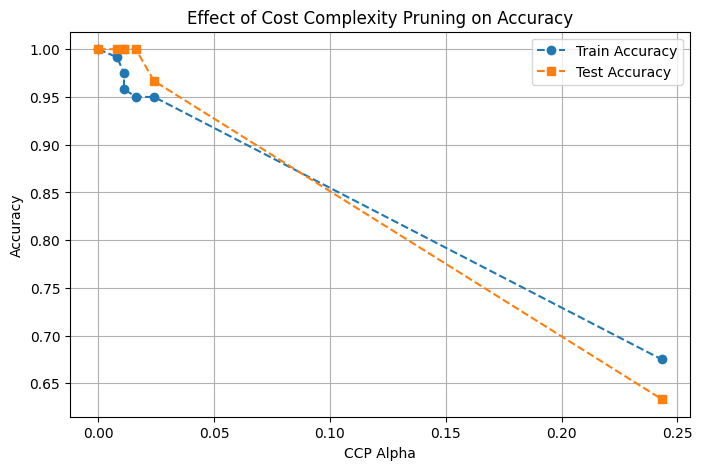

In [66]:
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_acc, marker='o', label="Train Accuracy", linestyle="dashed")
plt.plot(ccp_alphas, test_acc, marker='s', label="Test Accuracy", linestyle="dashed")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.legend()
plt.grid()
plt.show()

Q28. Train a Decision Tree Classifier and evaluate Precision, Recall, and F1-Score.

In [69]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Q29. Train a Decision Tree Classifier and visualize the confusion matrix using seaborn.


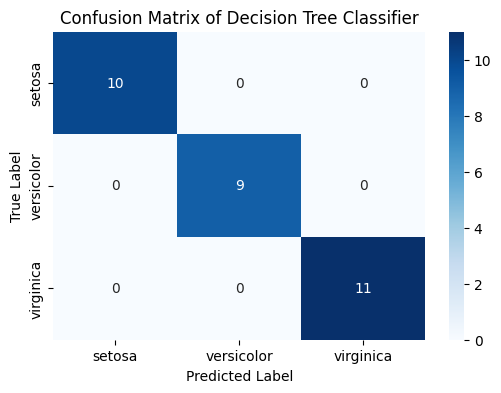

In [70]:
cm = confusion_matrix(y_test, y_pred)

# Visualize using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Decision Tree Classifier")
plt.show()

Q30. Train a Decision Tree Classifier and use GridSearchCV to find the best max_depth and min_samples_split.

In [72]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Model Accuracy: 1.0000
